# Time Series Analysis
    1. Data Ingestion
    2. EDA of Data
    3. Processing of Data
    4. Model Building
    5. Model Evaluation

## 1. Data Ingestion

    1. Import the Required Libraries such as Numpy, Pandas, Matplotlib and Seaborn.
    2. Load the data.
    3. Load the Time-Series Data into a Pandas DataFrame.
    4. Set the DateTime Column as index of the DataFrame.
    5. Check the Datatype of the index and convert it to DateTime if necessary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          758 non-null    object 
 1   Open          758 non-null    float64
 2   High          758 non-null    float64
 3   Low           758 non-null    float64
 4   Close         758 non-null    float64
 5   Volume        758 non-null    int64  
 6   Dividends     758 non-null    int64  
 7   Stock Splits  758 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 47.5+ KB


In [4]:
df.shape

(758, 8)

In [5]:
# Univariate Time Series
stock_data=df[['Date','Close']]

In [6]:
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [8]:
stock_data['Date']=pd.to_datetime(stock_data['Date'])

C:\Users\admin\AppData\Local\Temp\ipykernel_16200\3223040857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date']=pd.to_datetime(stock_data['Date'])


In [9]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [10]:
stock_data.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [11]:
stock_data.set_index('Date',inplace=True)

In [12]:
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


### Why we are converting Date Column as a Index Column?
    1. Easily Retrieving the Date
    2. Easy Visualization
    3. Some Libraries such as Scipy.stats required Date Column as an Index

In [13]:
stock_data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


## 2. EDA
1. Summary Statistics
    - Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
    - Plot the Time Series data 
    - Plot the rolling mean and rolling standard deviation of the Time Series data.
    - Decompose the Time Series Data check for any trends, seasonality, and Noise.
    - Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check
    - Check for stationarity.
    - Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
    - Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
    - Detect and handle outliers using statistical methods or machine learning techniques.

In [14]:
# Summary Statistics
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


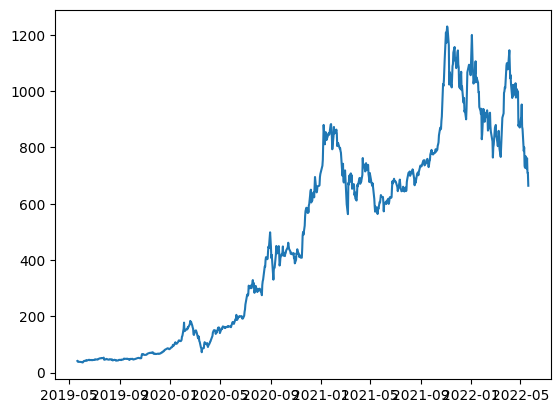

In [15]:
# Visualize the Time Series Data
plt.plot(stock_data['Close'])

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

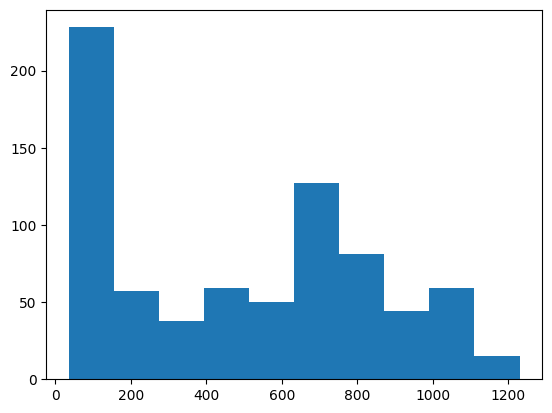

In [16]:
plt.hist(stock_data['Close'])

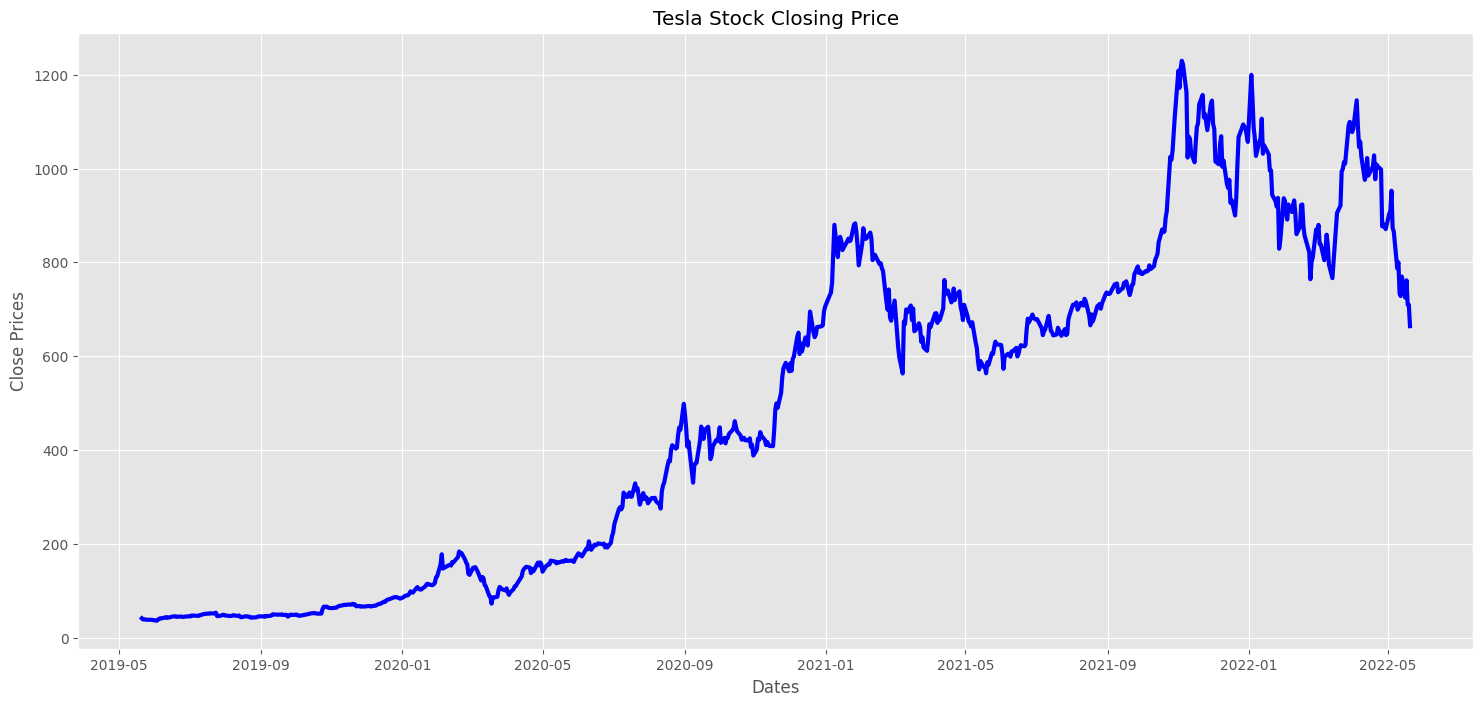

In [17]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'],color='blue',linewidth=3)
plt.title('Tesla Stock Closing Price')
plt.show()

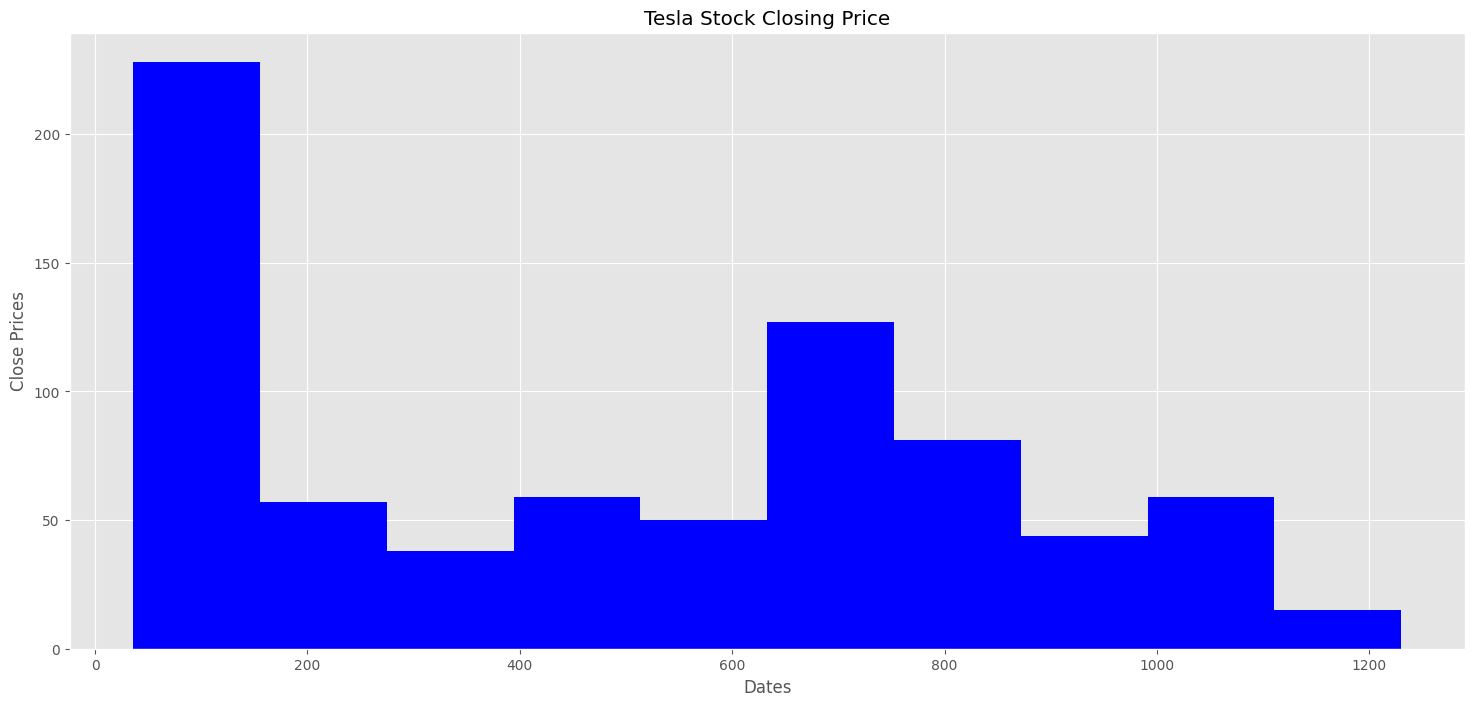

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.hist(stock_data['Close'],color='blue',linewidth=3)
plt.title('Tesla Stock Closing Price')
plt.show()

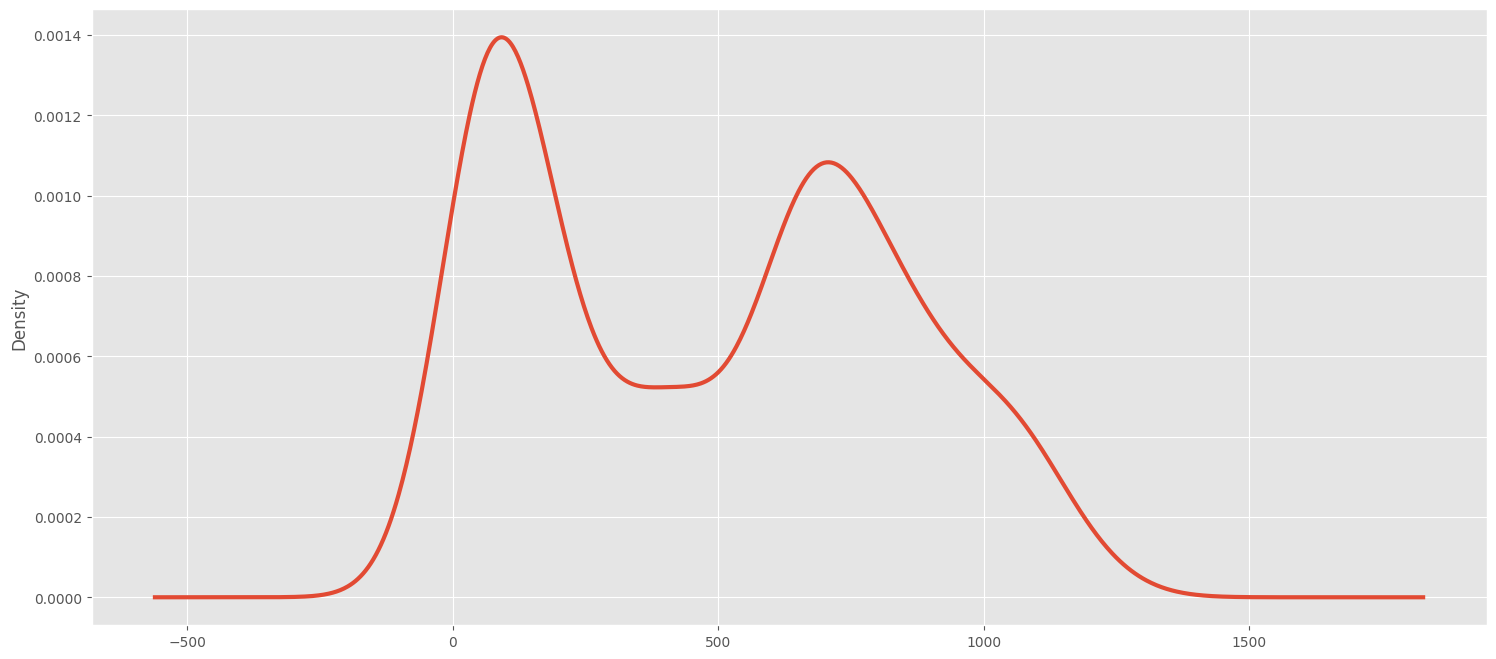

In [19]:
# Distribution of Close Price
df_close=stock_data['Close']
df_close.plot(kind='kde',figsize=(18,8),linewidth=3)
plt.grid('both')
plt.ylabel("Density")
plt.show()

In [20]:
# Rolling Average
Rolling_Average=stock_data['Close'].rolling(12).mean()

In [21]:
Rolling_Average

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    826.467504
2022-05-17    817.371668
2022-05-18    801.277501
2022-05-19    784.625000
2022-05-20    760.565002
Name: Close, Length: 758, dtype: float64

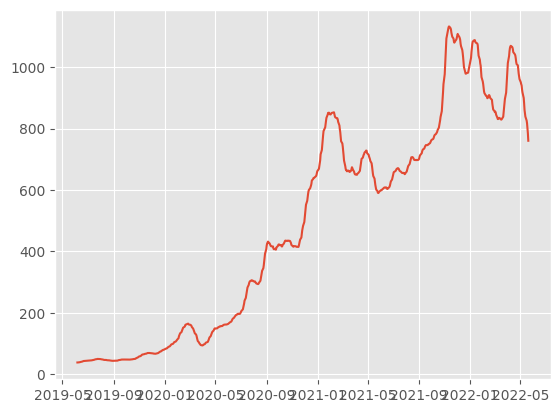

In [22]:
plt.plot(Rolling_Average)

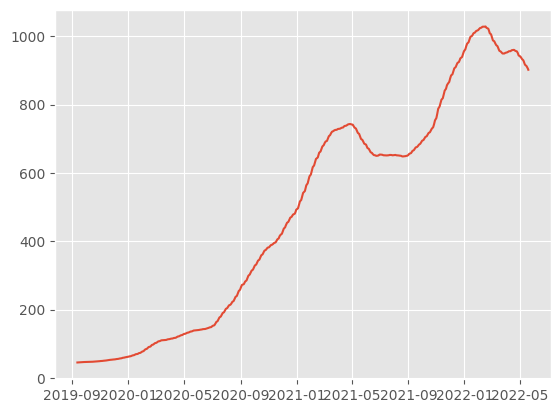

In [23]:
plt.plot(stock_data['Close'].rolling(80).mean())

- As we increase the Window Size, the curve is getting Smoothened

In [24]:
# Rolling Standard Deviation
Rolling_Std=stock_data['Close'].rolling(12).std()

In [25]:
Rolling_Std

Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23          NaN
2019-05-24          NaN
2019-05-28          NaN
                ...    
2022-05-16    78.887958
2022-05-17    79.606002
2022-05-18    80.253903
2022-05-19    76.455365
2022-05-20    63.033361
Name: Close, Length: 758, dtype: float64

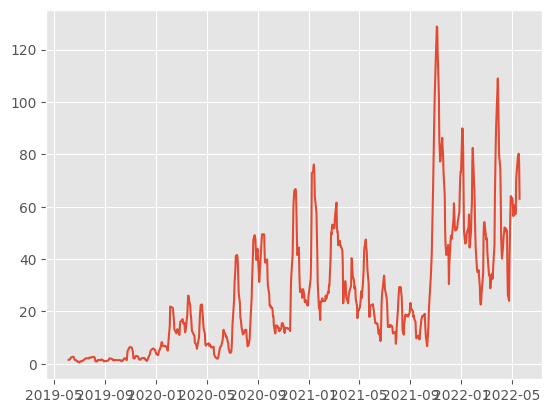

In [26]:
plt.plot(Rolling_Std)

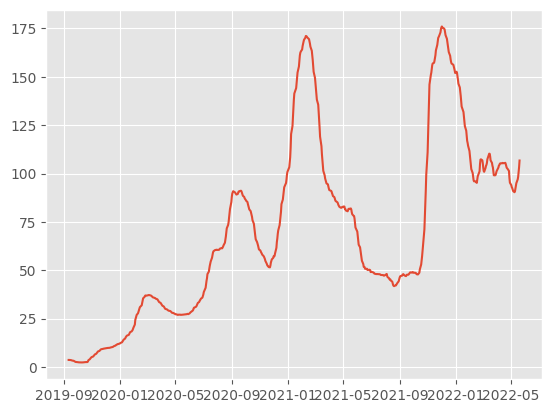

In [27]:
plt.plot(stock_data['Close'].rolling(80).std())

#### Plotting All Graphs Time Series, Rolling Average and Rolling Std wth Window Size=80

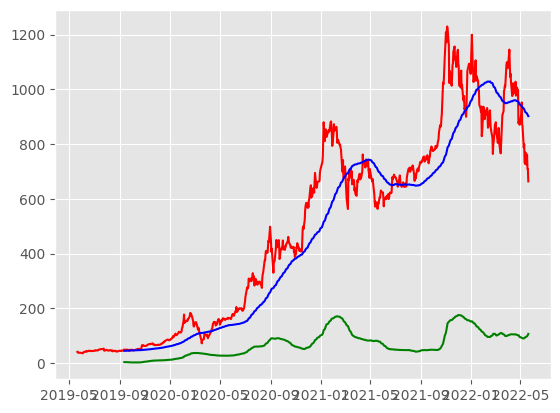

In [28]:
plt.plot(stock_data['Close'],color='red')
plt.plot(stock_data['Close'].rolling(80).mean(),color='blue')
plt.plot(stock_data['Close'].rolling(80).std(),color='green')

In [29]:
!pip install statsmodels

In [30]:
# Ada Fuller test
from statsmodels.tsa.stattools import adfuller
adt=adfuller(stock_data['Close'])

In [34]:
pd.Series(adt[0:4],index=['test_stats','p_value','lag','total_data_points'])

test_stats            -1.363009
p_value                0.599876
lag                    9.000000
total_data_points    748.000000
dtype: float64

In [35]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

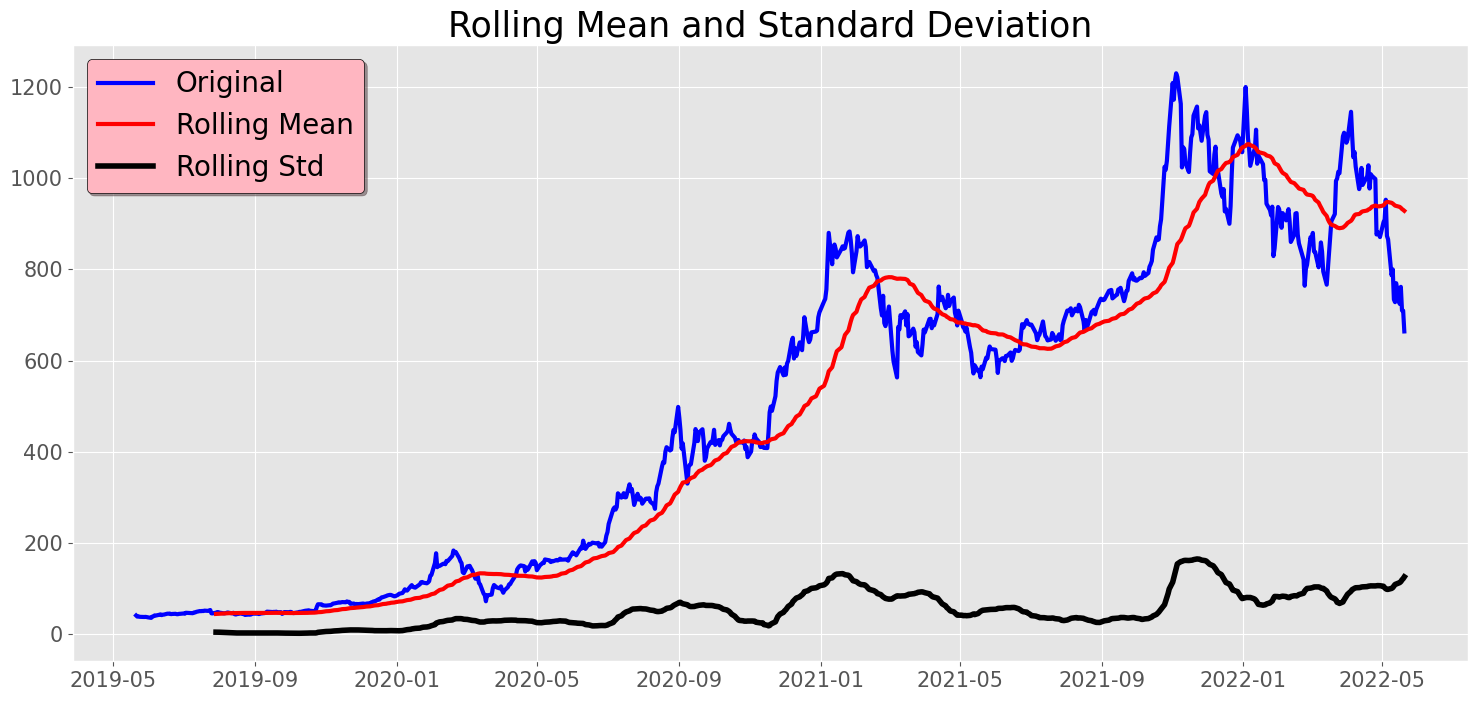

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [36]:
test_stationarity(stock_data['Close'])

In [45]:
# Additive(default) Model
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data['Close'],period=12)

In [39]:
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

<Figure size 2000x1000 with 0 Axes>

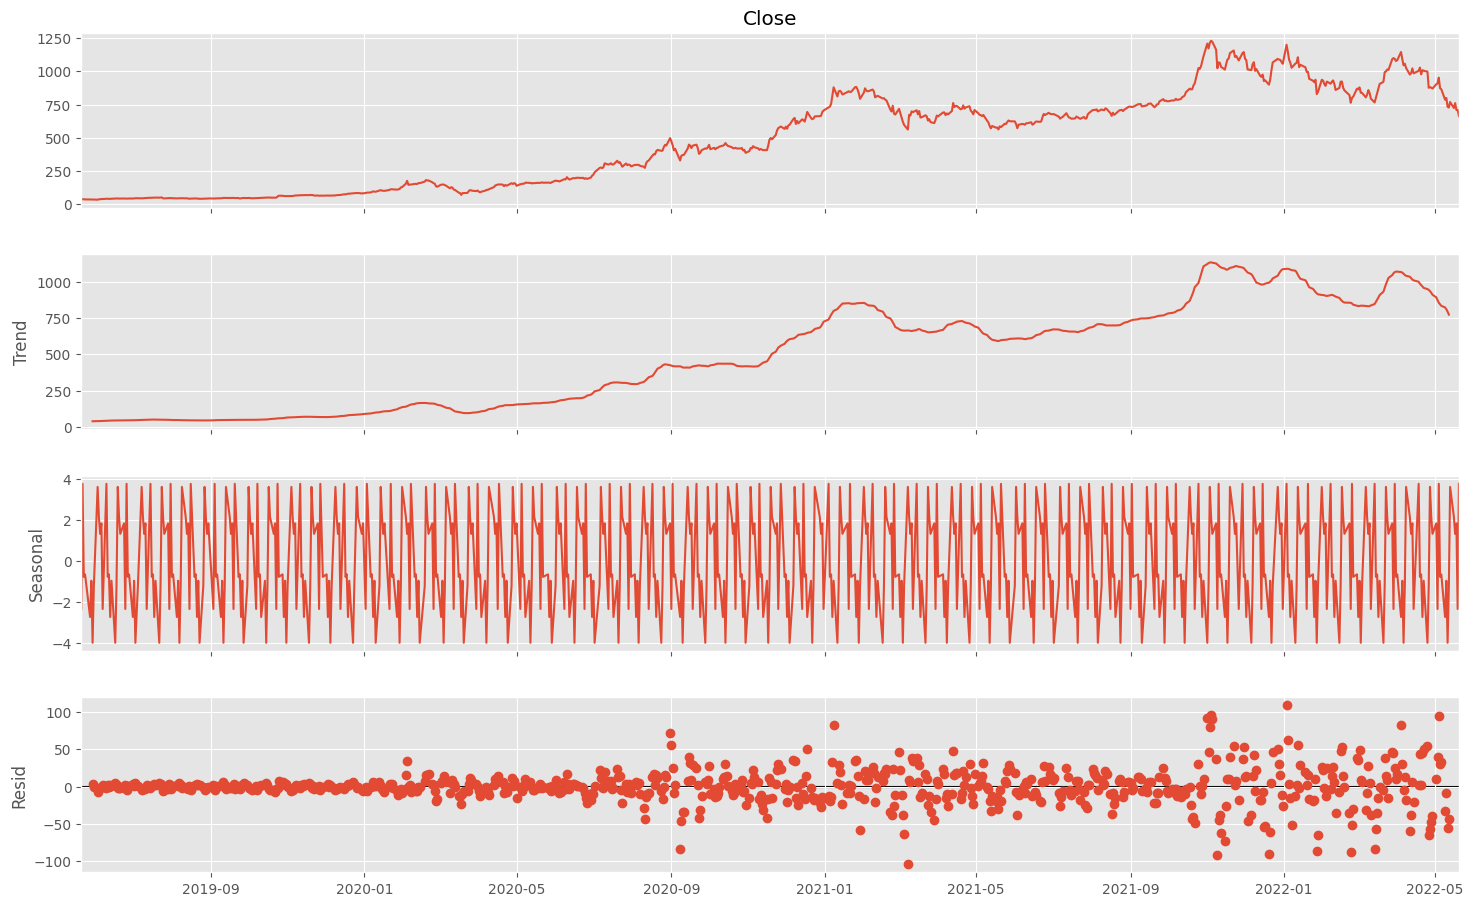

In [46]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [47]:
# Multiplicative Model
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data['Close'],period=12,model='multiplicative')

<Figure size 2000x1000 with 0 Axes>

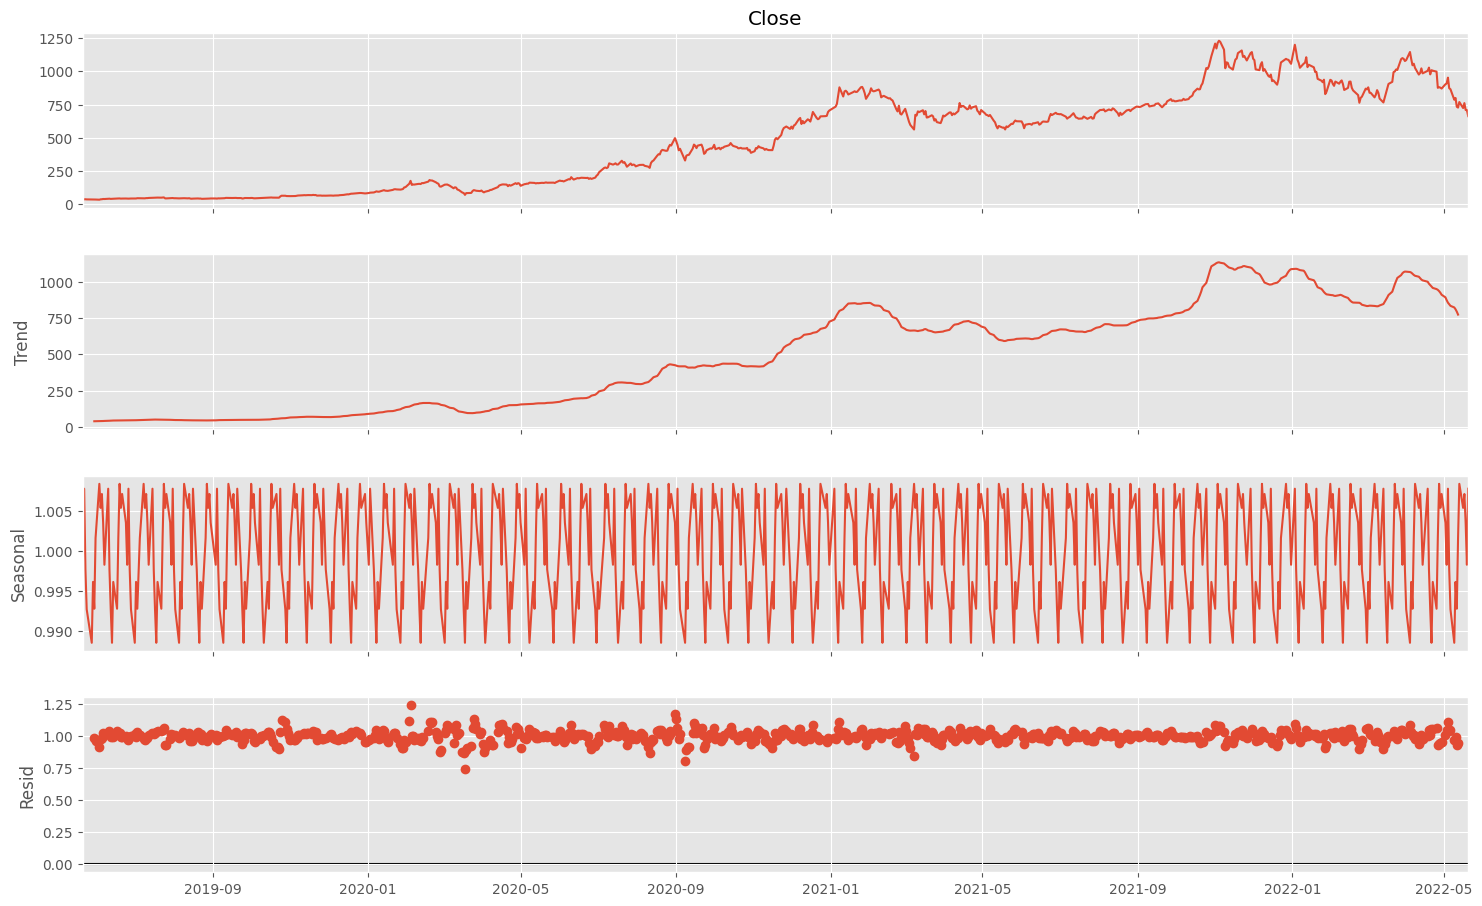

In [48]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

<Axes: ylabel='Close'>

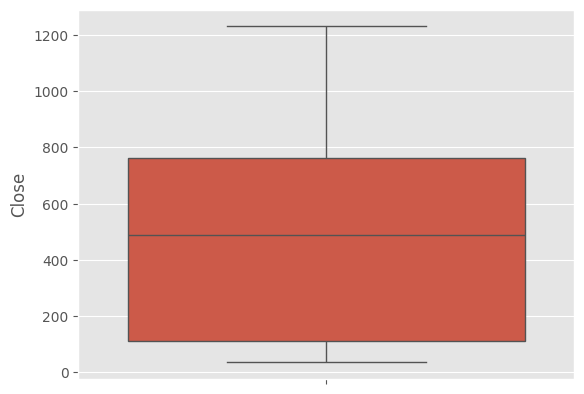

In [49]:
sns.boxplot(stock_data['Close'])

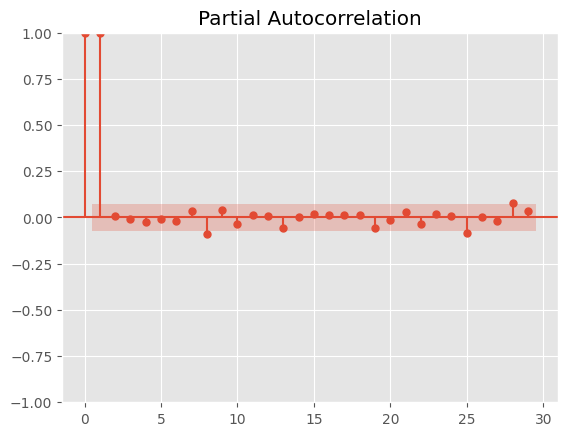

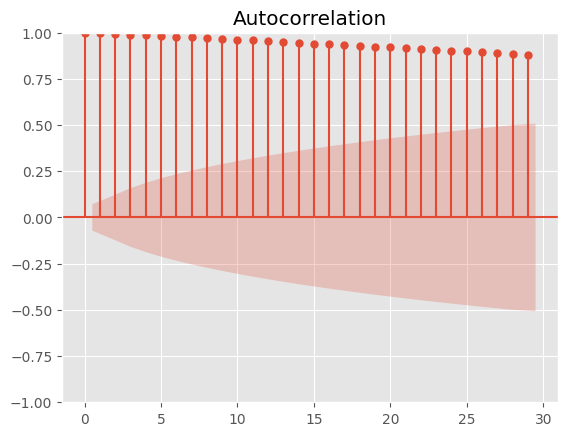

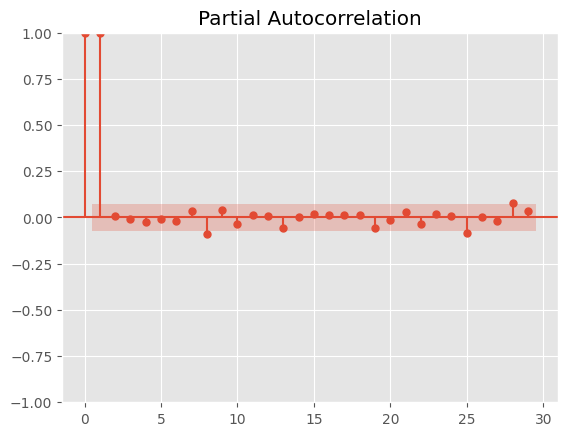

In [51]:
# Check for AutoCorrelation
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock_data['Close'])
plot_pacf(stock_data['Close'])

## 3. Preprocessing of Data
    1. Fill the missing Values
    2. Convert Data into Stationary Time Series
    3. If necessary then Normalize the data
    4. Split the Data into Train and Test
    5. Clean the data by removing the Outlier

In [55]:
df_close=df_close.diff()
df_close.dropna(inplace=True)

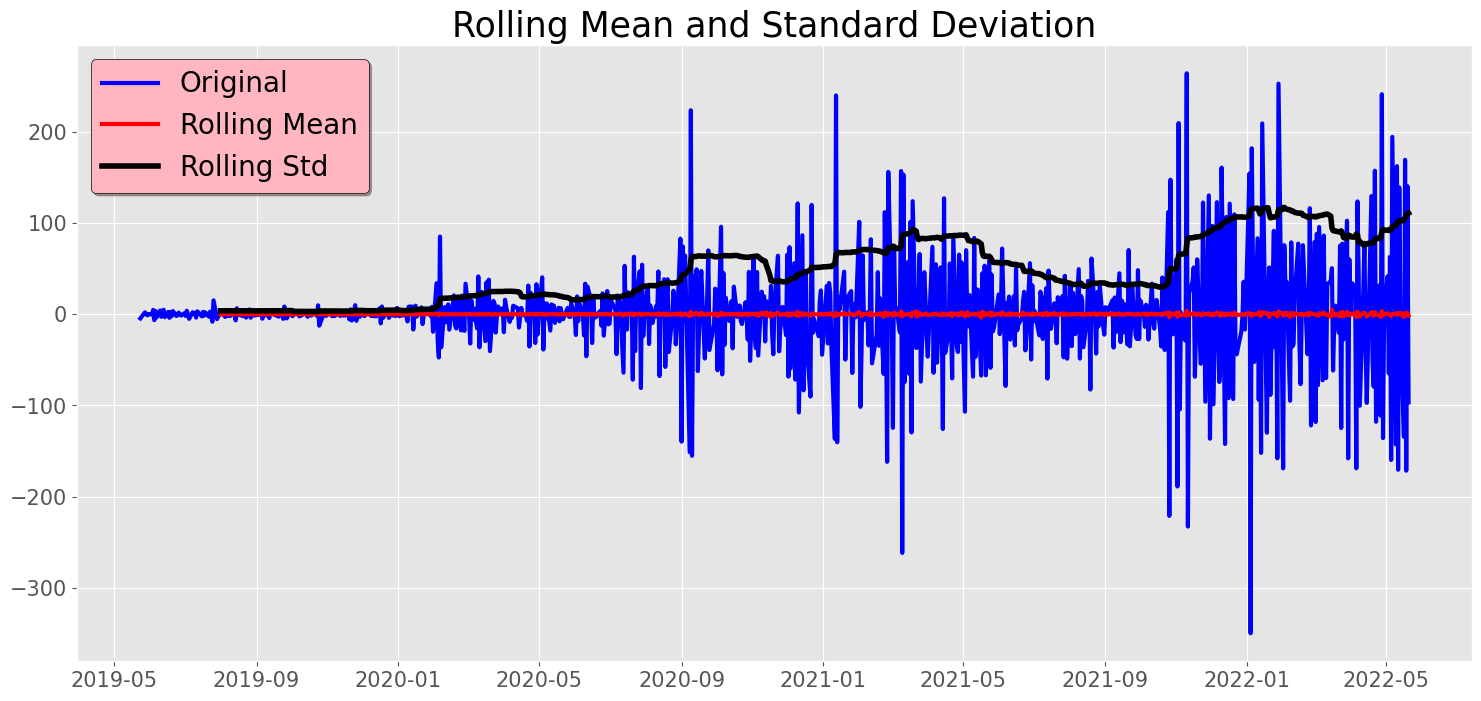

Results of dickey fuller test
Test Statistics               -1.311785e+01
p-value                        1.585467e-24
No. of lags used               2.000000e+01
Number of observations used    7.340000e+02
critical value (1%)           -3.439290e+00
critical value (5%)           -2.865486e+00
critical value (10%)          -2.568871e+00
dtype: float64


In [56]:
test_stationarity(df_close)

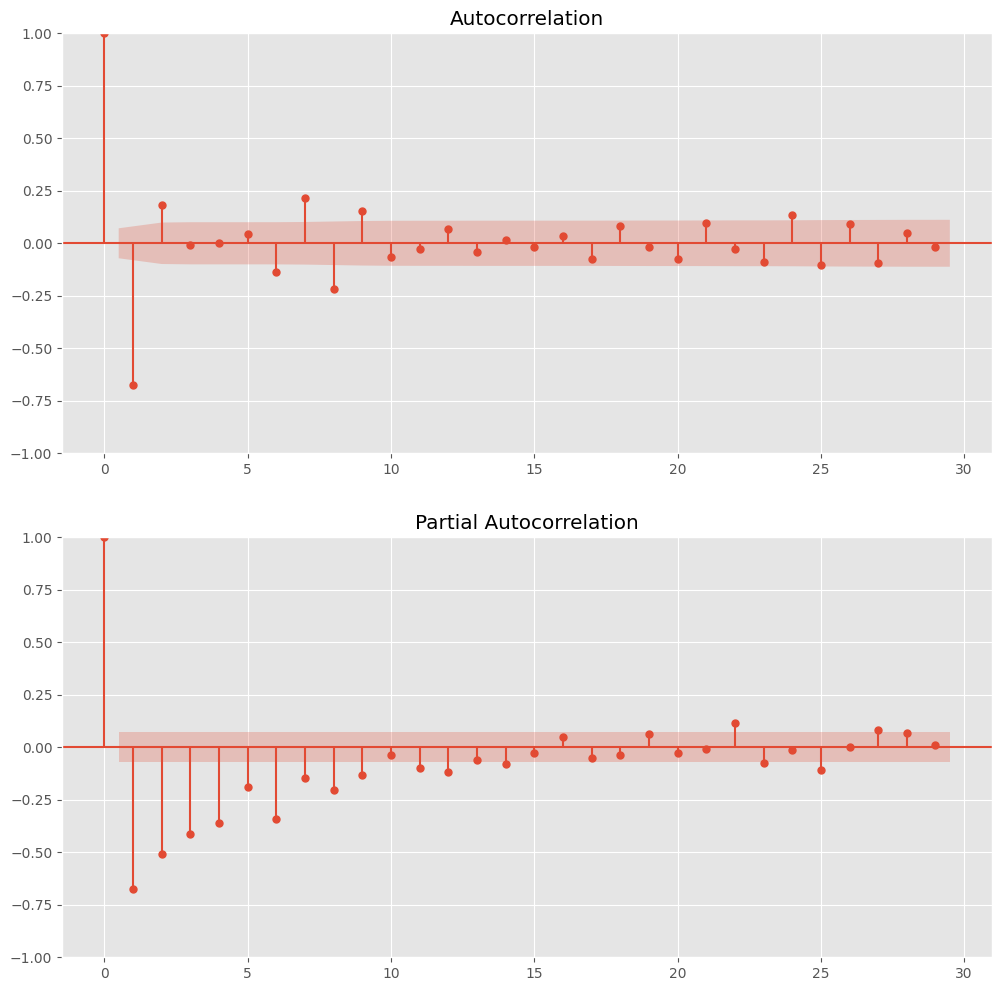

In [60]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(211)
plot_acf(df_close, ax=ax1)
ax2 = fig.add_subplot(212)
plot_pacf(df_close, ax=ax2)
plt.show()

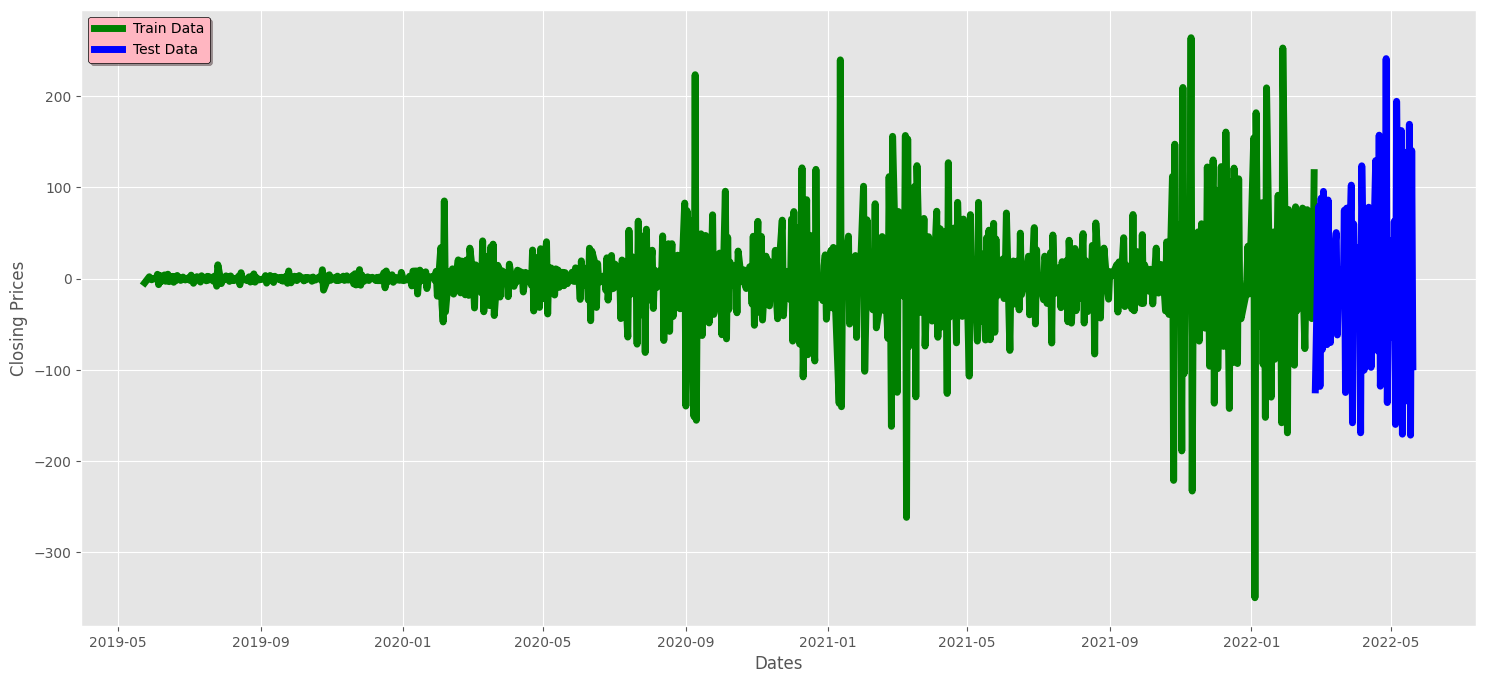

In [61]:
# Split data into Train and Test
train_data=df_close[0:-60]
test_data=df_close[-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel("Dates")
plt.ylabel("Closing Prices")
plt.plot(train_data,'green',label='Train Data',linewidth=5)
plt.plot(test_data,'blue',label='Test Data',linewidth=5)
plt.legend(shadow=True,facecolor='lightpink',edgecolor='k')